In [3]:
pip install python-igraph shapely

Note: you may need to restart the kernel to use updated packages.


In [48]:
!pip install tensorflow

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [37]:
!pip install torch torchvision

In [49]:
pip install spektral

Note: you may need to restart the kernel to use updated packages.


formofway:  A description of the road based on its nature or use
primaryrou: States if the RoadLink forms part of the Primary Route network
operationa:  Indicator identifying the construction status of the road
directiona: Indication of the direction of traffic flow.
startgrade: The relative level of the link at the startNode
endgradese: The relative level of the link at the endNode.
elevationg:  The elevation gain is calculated from three-dimensional geometry to define the total ascent 
experienced when passing along a RoadLink feature.

In [1]:
import geopandas as gpd
import pandas as pd
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString
import networkx as nx
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from shapely import wkt

F:\Anaconda3\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-1-110ec2672a7c>:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS func

### process the feature matrix data

In [2]:
big = pd.read_csv('F:/STA/Dissertation/Data/results/FeatureMatrix_wes.csv')

In [3]:
big

,toid,date,car,geometry,roadclassi,length,formofway,trunkroad,primaryrou,directiona,startgrade,endgradese,elevationg,Volume
0,osgb4000000030407372,2020/01/01,65,"LINESTRING (528098 179231, 528124 179232)",BRoad,26.01,Single Carriageway,0.0,0.0,bothDirections,0.0,0.0,0m,NaN
1,osgb4000000030407372,2020/01/02,89,"LINESTRING (528098 179231, 528124 179232)",BRoad,26.01,Single Carriageway,0.0,0.0,bothDirections,0.0,0.0,0m,NaN
2,osgb4000000030407372,2020/01/03,90,"LINESTRING (528098 179231, 528124 179232)",BRoad,26.01,Single Carriageway,0.0,0.0,bothDirections,0.0,0.0,0m,NaN
3,osgb4000000030407372,2020/01/04,80,"LINESTRING (528098 179231, 528124 179232)",BRoad,26.01,Single Carriageway,0.0,0.0,bothDirections,0.0,0.0,0m,NaN
4,osgb4000000030407372,2020/01/05,84,"LINESTRING (528098 179231, 528124 179232)",BRoad,26.01,Single Carriageway,0.0,0.0,bothDirections,0.0,0.0,0m,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640997,osgb4000000031063610,2021/12/27,0,LINESTRING (527536.5669999998 181725.814999999...,Unclassified,22.79,Single Carriageway,0.0,0.0,bothDirections,0.0,0.0,0m,NaN
5640998,osgb4000000031063610,2021/12/28,0,LINESTRING (527536.5669999998 181725.814999999...,Unclassified,22.79,Single Carriageway,0.0,0.0,bothDirections,0.0,0.0,0m,NaN
5640999,osgb4000000031063610,2021/12/29,0,LINESTRING (527536.5669999998 181725.814999999...,Unclassified,22.79,Single Carriageway,0.0,0.0,bothDirections,0.0,0.0,0m,NaN
5641000,osgb4000000031063610,2021/12/30,7,LINESTRING (527536.5669999998 181725.814999999...,Unclassified,22.79,Single Carriageway,0.0,0.0,bothDirections,0.0,0.0,0m,NaN


In [4]:
columns_to_check = ['roadclassi', 'formofway', 'primaryrou', 'directiona', 'startgrade', 'endgradese']

for column in columns_to_check:
    unique_values_counts = big[column].value_counts()
    print(f"Unique values and counts for '{column}':")
    print(unique_values_counts)

Unique values and counts for 'roadclassi':
Unclassified    3668328
ARoad           1293975
BRoad            342630
LocalRoad        336069
Name: roadclassi, dtype: int64
Unique values and counts for 'formofway':
Single Carriageway                 4271940
Traffic Island Link At Junction     542376
Dual Carriageway                    419904
Traffic Island Link                 194643
Roundabout                           65610
Slip Road                            59049
Enclosed Traffic Area                45927
Shared Use Carriageway               41553
Name: formofway, dtype: int64
Unique values and counts for 'primaryrou':
0.0    5217453
1.0     423549
Name: primaryrou, dtype: int64
Unique values and counts for 'directiona':
bothDirections         3179898
inDirection            1340631
inOppositeDirection    1120473
Name: directiona, dtype: int64
Unique values and counts for 'startgrade':
0.0    5599449
1.0      41553
Name: startgrade, dtype: int64
Unique values and counts for 'endgrades

####  process this data and make it suitable for a feature matrix

In [5]:
# big['elevationg'] = big['elevationg'].str.rstrip('m').astype(float)
big['elevationg'] = big['elevationg'].replace('m$', '', regex=True).astype(float)

In [6]:
big.rename(columns={'Volume': 'smalldata','car': 'bigdata'}, inplace=True)

In [7]:
big = big[[ 'toid','date','geometry','smalldata', 'bigdata','roadclassi', 'length','formofway', 'primaryrou', 'directiona', 'startgrade', 'endgradese','elevationg']]

In [8]:
big

,toid,date,geometry,smalldata,bigdata,roadclassi,length,formofway,primaryrou,directiona,startgrade,endgradese,elevationg
0,osgb4000000030407372,2020/01/01,"LINESTRING (528098 179231, 528124 179232)",NaN,65,BRoad,26.01,Single Carriageway,0.0,bothDirections,0.0,0.0,0.0
1,osgb4000000030407372,2020/01/02,"LINESTRING (528098 179231, 528124 179232)",NaN,89,BRoad,26.01,Single Carriageway,0.0,bothDirections,0.0,0.0,0.0
2,osgb4000000030407372,2020/01/03,"LINESTRING (528098 179231, 528124 179232)",NaN,90,BRoad,26.01,Single Carriageway,0.0,bothDirections,0.0,0.0,0.0
3,osgb4000000030407372,2020/01/04,"LINESTRING (528098 179231, 528124 179232)",NaN,80,BRoad,26.01,Single Carriageway,0.0,bothDirections,0.0,0.0,0.0
4,osgb4000000030407372,2020/01/05,"LINESTRING (528098 179231, 528124 179232)",NaN,84,BRoad,26.01,Single Carriageway,0.0,bothDirections,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640997,osgb4000000031063610,2021/12/27,LINESTRING (527536.5669999998 181725.814999999...,NaN,0,Unclassified,22.79,Single Carriageway,0.0,bothDirections,0.0,0.0,0.0
5640998,osgb4000000031063610,2021/12/28,LINESTRING (527536.5669999998 181725.814999999...,NaN,0,Unclassified,22.79,Single Carriageway,0.0,bothDirections,0.0,0.0,0.0
5640999,osgb4000000031063610,2021/12/29,LINESTRING (527536.5669999998 181725.814999999...,NaN,0,Unclassified,22.79,Single Carriageway,0.0,bothDirections,0.0,0.0,0.0
5641000,osgb4000000031063610,2021/12/30,LINESTRING (527536.5669999998 181725.814999999...,NaN,7,Unclassified,22.79,Single Carriageway,0.0,bothDirections,0.0,0.0,0.0


In [9]:
# # Separate out the categorical columns
# categorical_columns = ['roadclassi', 'formofway', 'directiona']
# numerical_columns = ['length', 'primaryrou', 'startgrade', 'endgradese', 'elevationg']

# # One-hot encode the categorical columns
# encoder = OneHotEncoder(sparse=False)
# one_hot_encoded = encoder.fit_transform(big[categorical_columns])

# # Create a DataFrame from the one-hot encoded columns
# one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# # Concatenate the one-hot encoded columns with the original DataFrame
# big_processed = pd.concat([big, one_hot_df], axis=1)

# # Drop the original categorical columns
# big_processed.drop(columns=categorical_columns, inplace=True)

# # Standardize the numerical columns
# scaler = StandardScaler()
# big_processed[numerical_columns] = scaler.fit_transform(big_processed[numerical_columns])



# # Convert 'date' to datetime type
# big['date'] = pd.to_datetime(big['date'], format='%Y/%m/%d')

# # # Optionally, you could sort by date and toid if needed
# # big = big.sort_values(['date', 'toid'])

# # # Pivot the DataFrame to get into the correct shape for modeling
# # # Assuming 'toid' is your index and 'date' is your time column
# # pivot_big = big_processed.pivot(index='toid', columns='date')

### process the road net in Westminster 

In [10]:
wes_net = gpd.read_file('F:/STA/Dissertation/Data/results/wes_net/wes_net.shp')

In [11]:
wes_net['id'] = wes_net['id'].astype(int)

In [12]:
# Convert to a DataFrame
wes = pd.DataFrame(wes_net)
#set it to display all columns
pd.set_option('display.max_columns', None)
wes

,from,to,id,objectid,toid,identifier,identifi_1,beginlifes,fictitious,validfrom,reasonforc,roadclassi,routehiera,formofway,trunkroad,primaryrou,roadclas_1,roadname1,roadname2,roadname1_,roadname2_,operationa,provenance,directiona,length,matchstatu,alternatei,alternat_1,alternat_2,alternat_3,alternat_4,startgrade,endgradese,roadstruct,cyclefacil,roadwidthm,roadwidtha,elevationg,elevatio_1,startnode,endnode,shape_leng,geometry
0,111,112,56,56.0,osgb4000000030407372,4000000030407372,None,2017-04-15,0.0,None,Modified Geometry And Attributes,B Road,B Road,Single Carriageway,0.0,0.0,B319,Chesham Place,None,None,None,Open,OS Urban And OS Height,bothDirections,26.01,Matched,5990_52815881792390,None,None,None,None,0.0,0.0,None,None,9.2m,12.5m,0m,0.1m,osgb4000000029910271,osgb4000000029910272,26.019224,"LINESTRING (528098.000 179231.000, 528124.000 ..."
1,191,192,96,96.0,osgb4000000030815020,4000000030815020,None,2017-04-15,0.0,None,Modified Geometry And Attributes,Unclassified,Local Road,Single Carriageway,0.0,0.0,None,Westmoreland Terrace,None,None,None,Open,OS Urban And OS Height,bothDirections,16.20,Matched,5990_52883691781601,None,None,None,None,0.0,0.0,None,None,5.2m,10.4m,0m,0m,osgb4000000029967034,osgb4000000030812243,16.208499,"LINESTRING (528862.000 178101.000, 528868.600 ..."
2,235,236,118,118.0,osgb4000000030135555,4000000030135555,None,2017-04-15,0.0,None,Modified Geometry And Attributes,Unclassified,Local Road,Single Carriageway,0.0,0.0,None,Marne Street,None,None,None,Open,OS Urban And OS Height,bothDirections,243.60,Matched,5990_52429591827830,None,None,None,None,0.0,0.0,None,None,7.3m,7.7m,0.3m,1.5m,osgb4000000029911299,osgb4000000029911495,243.600375,"LINESTRING (524175.000 182801.000, 524194.000 ..."
3,253,254,127,127.0,osgb4000000030418885,4000000030418885,None,2017-04-15,0.0,None,Modified Geometry And Attributes,Unclassified,Local Road,Single Carriageway,0.0,0.0,None,Devonshire Close,None,None,None,Open,OS Urban And OS Height,bothDirections,38.45,Matched,5990_52867221819388,None,None,None,None,0.0,0.0,None,None,2.3m,5.7m,0m,0m,osgb4000000029970899,osgb4000000029970893,38.456343,"LINESTRING (528678.000 181920.000, 528673.730 ..."
4,274,275,138,138.0,osgb5000005101647057,5000005101647057,None,2017-04-15,0.0,None,Modified Geometry And Attributes,A Road,A Road Primary,Traffic Island Link,0.0,-1.0,A5,Edgware Road,None,None,None,Open,OS Urban And OS Height,inOppositeDirection,20.05,Matched,5990_52713921816152,None,None,None,None,0.0,0.0,None,None,5.5m,8.8m,0.2m,0m,osgb5000005101646984,osgb5000005101646983,20.050093,"LINESTRING (527145.381 181610.147, 527145.374 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7733,103586,173413,289993,289961.0,osgb4000000030343580,4000000030343580,None,2017-04-15,0.0,None,Modified Geometry And Attributes,Unclassified,Local Road,Single Carriageway,0.0,0.0,None,Marylebone Lane,None,None,None,Open,OS Urban And OS Height,inOppositeDirection,40.67,Matched,5990_52840531814287,None,None,None,None,0.0,0.0,None,None,3.9m,5.4m,0m,0.1m,osgb4000000029970013,osgb4000000029970014,40.670679,"LINESTRING (528410.000 181409.000, 528405.000 ..."
7734,112605,187233,289998,289966.0,osgb4000000030407389,4000000030407389,None,2017-04-15,0.0,None,Modified Geometry And Attributes,Unknown,Local Road,Traffic Island Link At Junction,0.0,0.0,None,Brompton Road,None,None,None,Open,OS Urban And OS Height,inDirection,27.45,Matched,5990_52765941796045,5990_52766441795938,None,None,None,0.0,0.0,None,None,7.4m,11.3m,0.2m,1.4m,osgb4000000029910285,osgb4000000029910308,27.459468,"LINESTRING (527665.200 179585.800, 527662.000 ..."
7735,76076,131805,290005,289973.0,osgb4000000030342684,4000000030342684,None,2017-04-15,0.0,None,Modified Geometry And Attributes,Unclassified,Local Road,Single Carriageway,0.0,0.0,None,Abbey Orchard Street,None,None,None,Open,OS Urban And OS Height,bothDirections,51.35

In [13]:
wes_toid = wes[['toid']]

In [14]:
# wes_toid.to_csv('F:/STA/Dissertation/Data/results/wes_toid.csv', index=False)

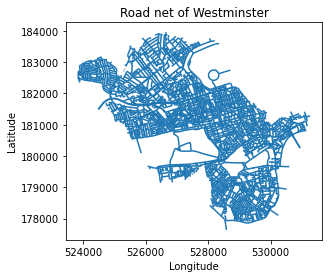

In [15]:
wes_net.plot()
# Optionally, you can add labels, titles, etc.
plt.title('Road net of Westminster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [16]:
# # Select data for Westminster
# small = small[small['Borough'] == 'Westminster']
# small = small[['Easting', 'Northing','toid','Date','Volume','Borough','roadclassi','Sp_Lim']]
# small.rename(columns={'Volume': 'smalldata'}, inplace=True)

In [ ]:
#small.to_csv('F:/STA/Dissertation/Data/results/small_wes.csv', index=False)

In [19]:
# wes.to_csv('F:/STA/Dissertation/Data/results/wes.csv', index=False)

#### build the adjacency matrix for samlldata without NaN

In [17]:
# 选择'smalldata'不为NaN的行
filtered_big = big[big['smalldata'].notna()]

# 选择'toid'和'geometry'列，并删除重复的组合
unique_small = filtered_big[['toid', 'geometry']].drop_duplicates()

# 输出结果
unique_small

,toid,geometry
1188999,osgb4000000031252081,"LINESTRING (528149 180507, 528153.7570000002 1..."
1490805,osgb4000000030217372,"LINESTRING (527966 181831, 527975 181803, 5279..."
2028078,osgb4000000030146942,"LINESTRING (530216 178622, 530186 178561, 5301..."
2300724,osgb5000005153221184,"LINESTRING (528947 179343, 528954.7680000002 1..."
2356128,osgb4000000030237633,"LINESTRING (528113 178752, 528179.8269999996 1..."
3067632,osgb4000000030237923,"LINESTRING (529768 179396, 529892.6169999996 1..."
3069819,osgb4000000030239011,"LINESTRING (528876 182020, 528865 182056, 5288..."
3499929,osgb4000000031075354,"LINESTRING (529529 178612, 529566.9129999997 1..."
3635523,osgb4000000030216523,"LINESTRING (527074 179697, 527071 179697, 5270..."
3965760,osgb5000005151364365,LINESTRING (529378.6289999997 181305.822100000...


In [18]:
# If the 'geometry' column is in a string format, convert it to Shapely objects
unique_small['geometry'] = unique_small['geometry'].apply(wkt.loads)

# Convert 'unique_small' to a GeoDataFrame
small_net = gpd.GeoDataFrame(unique_small, geometry='geometry')

In [19]:
# Reset the index so that it aligns with the adjacency matrix
small_net.reset_index(drop=True, inplace=True)

# Create a spatial index
sindex = small_net.sindex

# Create an adjacency matrix filled with zeros, with dimensions equal to the number of roads in 'small_net'
adj_matrix_s = np.zeros((len(small_net), len(small_net)), dtype=int)

# Iterate through the geometries
for index, row in small_net.iterrows():
    # Find possible candidates for intersection
    possible_matches_index = list(sindex.intersection(row['geometry'].bounds))
#     # Remove the current road from the candidates
#     possible_matches_index.remove(index)
    # Get the actual geometries for these candidates
    possible_matches = small_net.iloc[possible_matches_index]
    
    # Check the actual intersection
    for index_match, row_match in possible_matches.iterrows():
        if row['geometry'].intersects(row_match['geometry']):
            adj_matrix_s[index, index_match] = 1

In [20]:
# Convert the adjacency matrix to a NumPy array
adj_matrix_s_array = np.array(adj_matrix_s.data)
print(adj_matrix_s_array[:10,:10])

[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]


In [21]:
print(adj_matrix_s.shape)

(17, 17)


### Graph Construction only consider the road connectivity

#### using 'igraph' to get the connectivity matrix

In [22]:
# # the horizontal and vertical coordinates are the ids of the roads, takes a long time 
# # Create an empty graph
# G = ig.Graph()

# # Add vertices for each unique 'id' in the DataFrame
# for road_id in wes_net['id'].unique():
#     G.add_vertex(name=str(road_id))

# # Iterate through the DataFrame and add edges if geometries intersect
# for index_i, row_i in wes_net.iterrows():
#     geometry_i = row_i['geometry']
#     for index_j, row_j in wes_net.iterrows():
#         if index_i >= index_j:  # Avoid duplicate comparisons
#             continue
#         geometry_j = row_j['geometry']
#         if geometry_i.intersects(geometry_j):
#             G.add_edge(str(row_i['id']), str(row_j['id']))

# # Generate the adjacency matrix
# matrix = G.get_adjacency()


In [23]:
# # Convert the adjacency matrix to a NumPy array
# matrix_array = np.array(matrix.data)

In [24]:
# print(matrix_array[:10, :10])

#### using a spatial index like R-tree to be efficient 

In [25]:
# ？稀疏矩阵
# Create a spatial index
sindex = wes_net.sindex

# Create an adjacency matrix filled with zeros, with dimensions equal to the number of roads in 'wes_net'
adj_matrix = np.zeros((len(wes_net), len(wes_net)), dtype=int)

# Iterate through the geometries
for index, row in wes_net.iterrows():
    # Find possible candidates for intersection
    possible_matches_index = list(sindex.intersection(row['geometry'].bounds))
    # Remove the current road from the candidates
    possible_matches_index.remove(index)
    # Get the actual geometries for these candidates
    possible_matches = wes_net.iloc[possible_matches_index]
    
    # Check the actual intersection
    for index_match, row_match in possible_matches.iterrows():
        if row['geometry'].intersects(row_match['geometry']):
            adj_matrix[index, index_match] = 1

In [26]:
# Convert the adjacency matrix to a NumPy array
adj_matrix_array = np.array(adj_matrix.data)
print(adj_matrix_array[:10,:10])

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [27]:
print(adj_matrix.shape)

(7738, 7738)


### Graph construction consider both connectivity and spatial proximity

In [28]:
# sindex = wes_net.sindex
# proximity_threshold = 100  # Set an appropriate threshold for your data

# # reprojecting wes_net to a suitable projected CRS to calculate the distance
# wes_net = wes_net.to_crs(epsg=27700)

# spa_matrix = np.zeros((len(wes_net), len(wes_net)), dtype=int)


# for index, row in wes_net.iterrows():
#     possible_matches_index = list(sindex.intersection(row['geometry'].buffer(proximity_threshold).bounds))
#     possible_matches_index.remove(index)
#     possible_matches = wes_net.iloc[possible_matches_index]

#     for index_match, row_match in possible_matches.iterrows():
#         if row['geometry'].intersects(row_match['geometry']):
#             spa_matrix[index, index_match] = 1
#         elif row['geometry'].distance(row_match['geometry']) < proximity_threshold:
#             spa_matrix[index, index_match] = 1  # or another value to indicate proximity without connectivity

In [29]:
# # Convert the adjacency matrix to a NumPy array
# spa_matrix_array = np.array(spa_matrix.data)
# print(adj_matrix_array[:10,:10])

## GCN + LSTM

In [30]:
# import tensorflow as tf
# from spektral.layers import GCNConv
# from tensorflow.keras.layers import LSTM, Input, Dense
# from tensorflow.keras.models import Model
# from sklearn.model_selection import train_test_split

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#### Preprocessing the Data

In [32]:
# Identify valid locations
valid_locations = big['toid'][~big['smalldata'].isnull()].unique()

# Filter the DataFrame to include only valid locations
filtered_big = big[big['toid'].isin(valid_locations)]

# One-hot encode the categorical variables
encoded_df = pd.get_dummies(filtered_big[['roadclassi', 'formofway', 'directiona']])
feature_columns = ['bigdata', 'length', 'primaryrou', 'startgrade', 'endgradese', 'elevationg']
feature_columns += list(encoded_df.columns)
filtered_big_encoded = pd.concat([filtered_big, encoded_df], axis=1)

# Pivot the feature matrix into shape [locations, days, features]
feature_matrix = filtered_big_encoded.pivot(index='toid', columns='date', values=feature_columns)
feature_matrix = feature_matrix.values.reshape(len(valid_locations), 729, -1)  # valid locations, 729 days

# Pivot y_matrix
y_matrix = filtered_big.pivot(index='toid', columns='date', values='smalldata').values

# Now you can split the data
X_train, X_val, y_train, y_val = train_test_split(feature_matrix, y_matrix, test_size=0.2, random_state=42)


#### Converting Data to PyTorch Tensors

In [48]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Convert adjacency matrix into PyTorch tensor
adj_matrix_s_tensor = torch.tensor(adj_matrix_s, dtype=torch.float32)


In [49]:
# # Convert adjacency matrix to PyTorch tensor
# A_tensor = torch.FloatTensor(adj_matrix_s).to(device)

# # Convert training and validation data to PyTorch tensors
# X_train_tensor = torch.FloatTensor(X_train).to(device)
# X_val_tensor = torch.FloatTensor(X_val).to(device)
# y_train_tensor = torch.FloatTensor(y_train).unsqueeze(-1).to(device) # Adding singleton dimension for labels
# y_val_tensor = torch.FloatTensor(y_val).unsqueeze(-1).to(device) # Adding singleton dimension for labels

#### Building the Model

In [50]:
# Number of node features
node_features = feature_matrix.shape[-1]

# Hyperparameters
hidden_gcn = 64 # Example value, adjust as needed
hidden_lstm = 64 # Example value, adjust as needed
num_layers_lstm = 2 # Example value, adjust as needed


# GCN Layer
class GCNLayer(nn.Module):
    def __init__(self, in_features, out_features):
        super(GCNLayer, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, A, X):
        # Ensure that X has shape (num_nodes, in_features)
        X = X.transpose(0, 1) if X.shape[0] != A.shape[0] else X
        return F.relu(torch.matmul(torch.matmul(A, X), self.linear.weight))
#     def forward(self, A, X):
#         return F.relu(torch.matmul(torch.matmul(A, X), self.linear.weight))

# GCN-LSTM Model
class GCNLSTM(nn.Module):
    def __init__(self, node_features, hidden_gcn, hidden_lstm, num_layers_lstm):
        super(GCNLSTM, self).__init__()
        self.gcn = GCNLayer(node_features, hidden_gcn)
        self.lstm = nn.LSTM(hidden_gcn, hidden_lstm, num_layers=num_layers_lstm, batch_first=True)
        self.fc = nn.Linear(hidden_lstm, 1) # Output layer to predict 'smalldata'
        
    def forward(self, A, X_sequence):
        embeddings = [self.gcn(A, X_t) for X_t in X_sequence]
        embeddings = torch.stack(embeddings, dim=1)
        lstm_out, _ = self.lstm(embeddings)
        return self.fc(lstm_out[:, -1, :]) # Returning the prediction for 'smalldata'

# Create the model
model = GCNLSTM(node_features, hidden_gcn, hidden_lstm, num_layers_lstm)

# If using GPU
if torch.cuda.is_available():
    model.cuda()

#### Training the Model

In [51]:
from torch.optim import Adam
from torch.nn import MSELoss

In [52]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
A_tensor = torch.tensor(adj_matrix_s, dtype=torch.float32).to(device)
model = model.to(device)

In [53]:
# Define the number of epochs
num_epochs = 50 # Example value, adjust as needed

# X_sequence = [torch.FloatTensor(x).to(device) for x in X_sequence]
X_sequence = [X_train_tensor[:, day, :].transpose(0, 1) for day in range(X_train_tensor.shape[1])]

# Define loss function and optimizer
loss_function = MSELoss()
optimizer = Adam(model.parameters())
  
# Training loop
for epoch in range(num_epochs):
    model.train() # Set the model to training mode
    optimizer.zero_grad() # Reset gradients

    # Prepare feature sequence for LSTM (using the tensor version of X_train)
    X_sequence = [X_train_tensor[:, day, :] for day in range(X_train_tensor.shape[1])]

    # Forward pass
    predictions = model(A_tensor, X_sequence)
    
    # Compute loss
    loss = loss_function(predictions, y_train_tensor)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (17x17 and 14x13)

#### Evaluating the Model

In [ ]:
model.eval()
with torch.no_grad():
    val_predictions = model(adj_matrix_s_tensor, X_val_tensor)
    val_loss = loss_function(val_predictions, y_val_tensor)
    # Additional code to compute other metrics


### tensorflow + only 4 features

In [ ]:
# # Constants
# hidden_units = 64      # LSTM hidden units
# num_nodes = 7738    # Number of roads/locations
# time_steps = 729    # Number of different days of data
# num_features = 9    # Number of features

# # Step 1: Convert 'date' to a datetime object
# big['date'] = pd.to_datetime(big['date'])

# # Step 2: Set 'toid' and 'date' as the index and sort
# big = big.set_index(['toid', 'date']).sort_index()

# # Step 3: Pivot to have 'toid' and 'date' as multi-index and features as columns
# pivot_big = big.pivot_table(index=['toid', 'date'], 
#                             values=['bigdata', 'roadclassi', 'length', 'formofway',
#                                     'primaryrou', 'directiona','startgrade','endgradese','elevationg'], 
#                             aggfunc='first')

# # Step 4: Reshape to 3D array
# feature_matrix = pivot_big.values.reshape((num_nodes, time_steps, num_features))

In [ ]:
# # Input Layers
# A_input = Input(shape=(num_nodes,), sparse=True, name="Adjacency_Matrix")
# X_input = Input(shape=(time_steps, num_features), name="Feature_Matrix")

# # Graph Convolutional Network Layer (Spatial Processing)
# graph_conv = GCNConv(hidden_units)([X_input, A_input])

# # Long Short-Term Memory Layer (Temporal Processing)
# lstm_out = LSTM(hidden_units, return_sequences=True)(graph_conv)

# # Prediction Layer
# output = Dense(1)(lstm_out) # Adjust depending on the prediction task

# # Model Compilation
# model = Model(inputs=[X_input, A_input], outputs=output)
# model.compile(optimizer='adam', loss='mse') # Adjust loss and metrics as needed.


In [ ]:
# # Filter only rows with known 'smalldata'
# known_data = big.dropna(subset=['smalldata'])

# # Pivot known_data for y_matrix
# pivot_y = known_data.pivot(index='toid', columns='date', values='smalldata')
# y_matrix = pivot_y.values

# # Get the index of known toids
# known_toids = pivot_y.index

# # Filter feature data based on known_toids
# feature_data = big[big['toid'].isin(known_toids)]

# # Pivot feature_data for feature_matrix
# pivot_features = feature_data.pivot_table(index='toid', columns='date', values=['bigdata', 'roadclassi', 'length'], aggfunc='first')

# # Reorder pivot_features based on known_toids
# pivot_features = pivot_features.loc[known_toids]

# # Reshape feature_matrix
# feature_matrix = pivot_features.values.reshape((len(known_toids), time_steps, num_features))

# # Check that the shapes are consistent
# assert feature_matrix.shape[0] == y_matrix.shape[0], "Features and targets must have the same number of samples."

# # Splitting data
# X_train, X_val, y_train, y_val = train_test_split(feature_matrix, y_matrix, test_size=0.2, random_state=42)

# # Train the model
# model.fit([X_train, adj_matrix], y_train, epochs=50, validation_data=([X_val, adj_matrix], y_val))
